In [2]:
# Looping
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Dict, List

In [3]:
class AgentState(TypedDict):
    name:str
    number: List[int]
    counter:int

In [13]:
def greeting(state:AgentState)->AgentState:
    """Greet the person"""
    state["name"] = f"hello {state['name']}"
    state["counter"] = 0
    return state
    
def randoms(state:AgentState)->AgentState:
    """Random node"""
    state["number"].append(random.randint(0,10))
    state["counter"] += 1
    return state

def should_continue(state:AgentState)->AgentState:
    """Should continue loop"""
    if state["counter"] < 5:
        return  "loop"
    else:
        return "exit"
        
    

In [14]:
graph = StateGraph(AgentState)

graph.add_node("greet", greeting)
graph.add_node("randoms", randoms)

graph.add_edge(START, "greet")
graph.add_edge("greet", "randoms")

graph.add_conditional_edges("randoms", should_continue, {"loop": "randoms", "exit": END})

app = graph.compile()

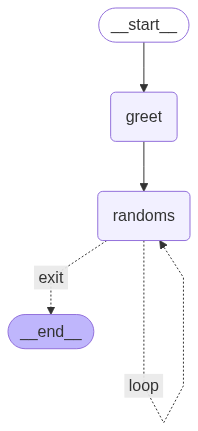

In [10]:
from IPython.display import display , Image

display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
app.invoke({"name": "Sam", "number": []})

{'name': 'hello Sam', 'number': [4, 9, 9, 7, 3], 'counter': 5}

In [17]:
## Exercise
class AgentState(TypedDict):
    player_name:str
    guesses : List[int]
    attempts: int
    lower_bound:int
    upper_bound:int
    

In [ ]:
def setup(state:AgentState)->AgentState:
    """setup the game rules""" 
    state["name"] = state["name"]
    state["lower_bound"] = state["lower_bound"]
    state["upper_bound"] = state["upper_bound"]
    return state

def guess